In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#matplotlib.use('WxAgg')

In [4]:
import makeAmoebasX
import amoeba2Dxx
import amoebaSegments2x
from matplotlib import colormaps

In [63]:
def draw1(xs,ys,DEBUG_COLORS=False):
    cmap1 = plt.cm.jet #colormaps.get_cmap("Spectral")

    fig=plt.figure(figsize=(5,5))

    for n,x1 in enumerate(xs):
        am1_x=xs[n]
        am1_y=ys[n]

        for nseg,seg1 in enumerate(am1_x):
            segs1_x = am1_x[nseg]
            segs1_y = am1_y[nseg]
            if DEBUG_COLORS:
                col1=cmap1(nseg/len(am1_x))
                ls = '-' if n<amoeba_struct.num_targets else '--'  
                lw = 2 if n<amoeba_struct.num_targets else 1
            else:
                col1='k'
                ls = '-'
                lw=1
            fig.gca().plot( segs1_x, segs1_y, color=col1, label='%d:%d'%(n,nseg), ls=ls, lw=lw )

    plt.xlim(0,amoeba_struct.image_rect_size)
    plt.ylim(0,amoeba_struct.image_rect_size)
    if DEBUG_COLORS:
        plt.legend()
    else:
        plt.axis('equal')
        plt.axis('off')

    # Get the plot data as an RGB string and convert to a NumPy array
    plt.show()
    fig.canvas.draw()
    data = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    image_array = data.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    return image_array

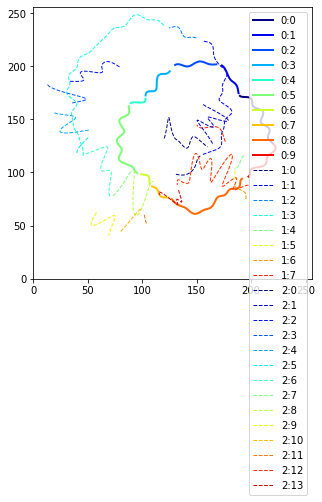

In [99]:
amoeba_struct = makeAmoebasX.amoeba_struct 

amoeba_struct.num_targets = 1
amoeba_struct.num_distractors   = 3 - amoeba_struct.num_targets
amoeba_struct.rand_state = 102 # Clutter from target stim
[s,xs,ys]=amoeba2Dxx.amoeba2Dxx( makeAmoebasX.amoeba_struct )

draw1(xs,ys,True);


In [100]:
imx= image_array.max(2)
print( imx.shape, imx.max(), imx.min())

(360, 360) 255 1


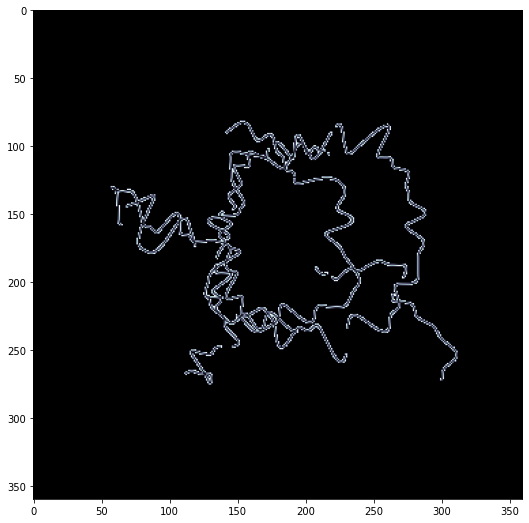

In [101]:
plt.figure(figsize=(9,9))
plt.imshow( 255 - imx,cmap='bone')
plt.show()

In [110]:
buf=np.zeros( (amoeba_struct.image_rect_size,amoeba_struct.image_rect_size))
def bresenham_line(start: tuple[int, int], end: tuple[int, int]) -> list[tuple[int, int]]:
    global buf
    
    """Generates a list of (x, y) coordinates for a line using Bresenham's algorithm."""
    x1, y1 = start
    x2, y2 = end

    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy

    points = []
    while True:
        points.append((x1, y1))
        buf[-y1,x1]=1
        if x1 == x2 and y1 == y2:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
    return points

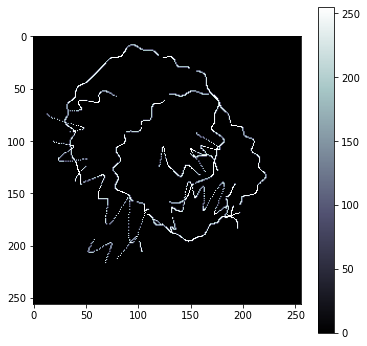

In [119]:
for nobj in np.arange(len(xs)):
    for nseg in np.arange(len(xs[nobj])):
        for nrad in np.arange(len(xs[nobj][nseg])):
            bresenham_line( (int(xs[nobj][nseg][nrad]),int(ys[nobj][nseg][nrad])),
                           (int(xs[nobj][nseg][nrad]),int(ys[nobj][nseg][nrad])) )
plt.figure(figsize=(6,6))
plt.imshow(buf*255,cmap='bone')
plt.colorbar()

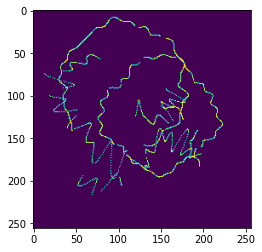

In [118]:
plt.imshow(buf)